In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import TimeSeriesSplit
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [4]:
"""This dataset is from worldometer's coronavirus data taken on Oct-31-2020"""
data1 = pd.read_csv("coronavirus_data.csv") 
data1.columns
#We notice that there are columns:
#        'Country', 'Total Cases', 'New Cases' *, 
#        'Total Deaths', 'New Deaths' *, 'Total Recovered',
#        'Active Cases' *, 'Serious Critical' *, 'Total Cases/1M pop',
#        'Deaths/1M pop', 'Total Tests', 'Tests/1M pop',
#        'Population'
# We're going to perform some data vis here


Index(['Country', 'Total Cases', 'New Cases', 'Total Deaths', 'New Deaths',
       'Total Recovered', 'Active Cases', 'Serious Critical',
       'Total Cases/1M pop', 'Deaths/1M pop', 'Total Tests', 'Tests/1M pop',
       'Population'],
      dtype='object')

D:\Anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


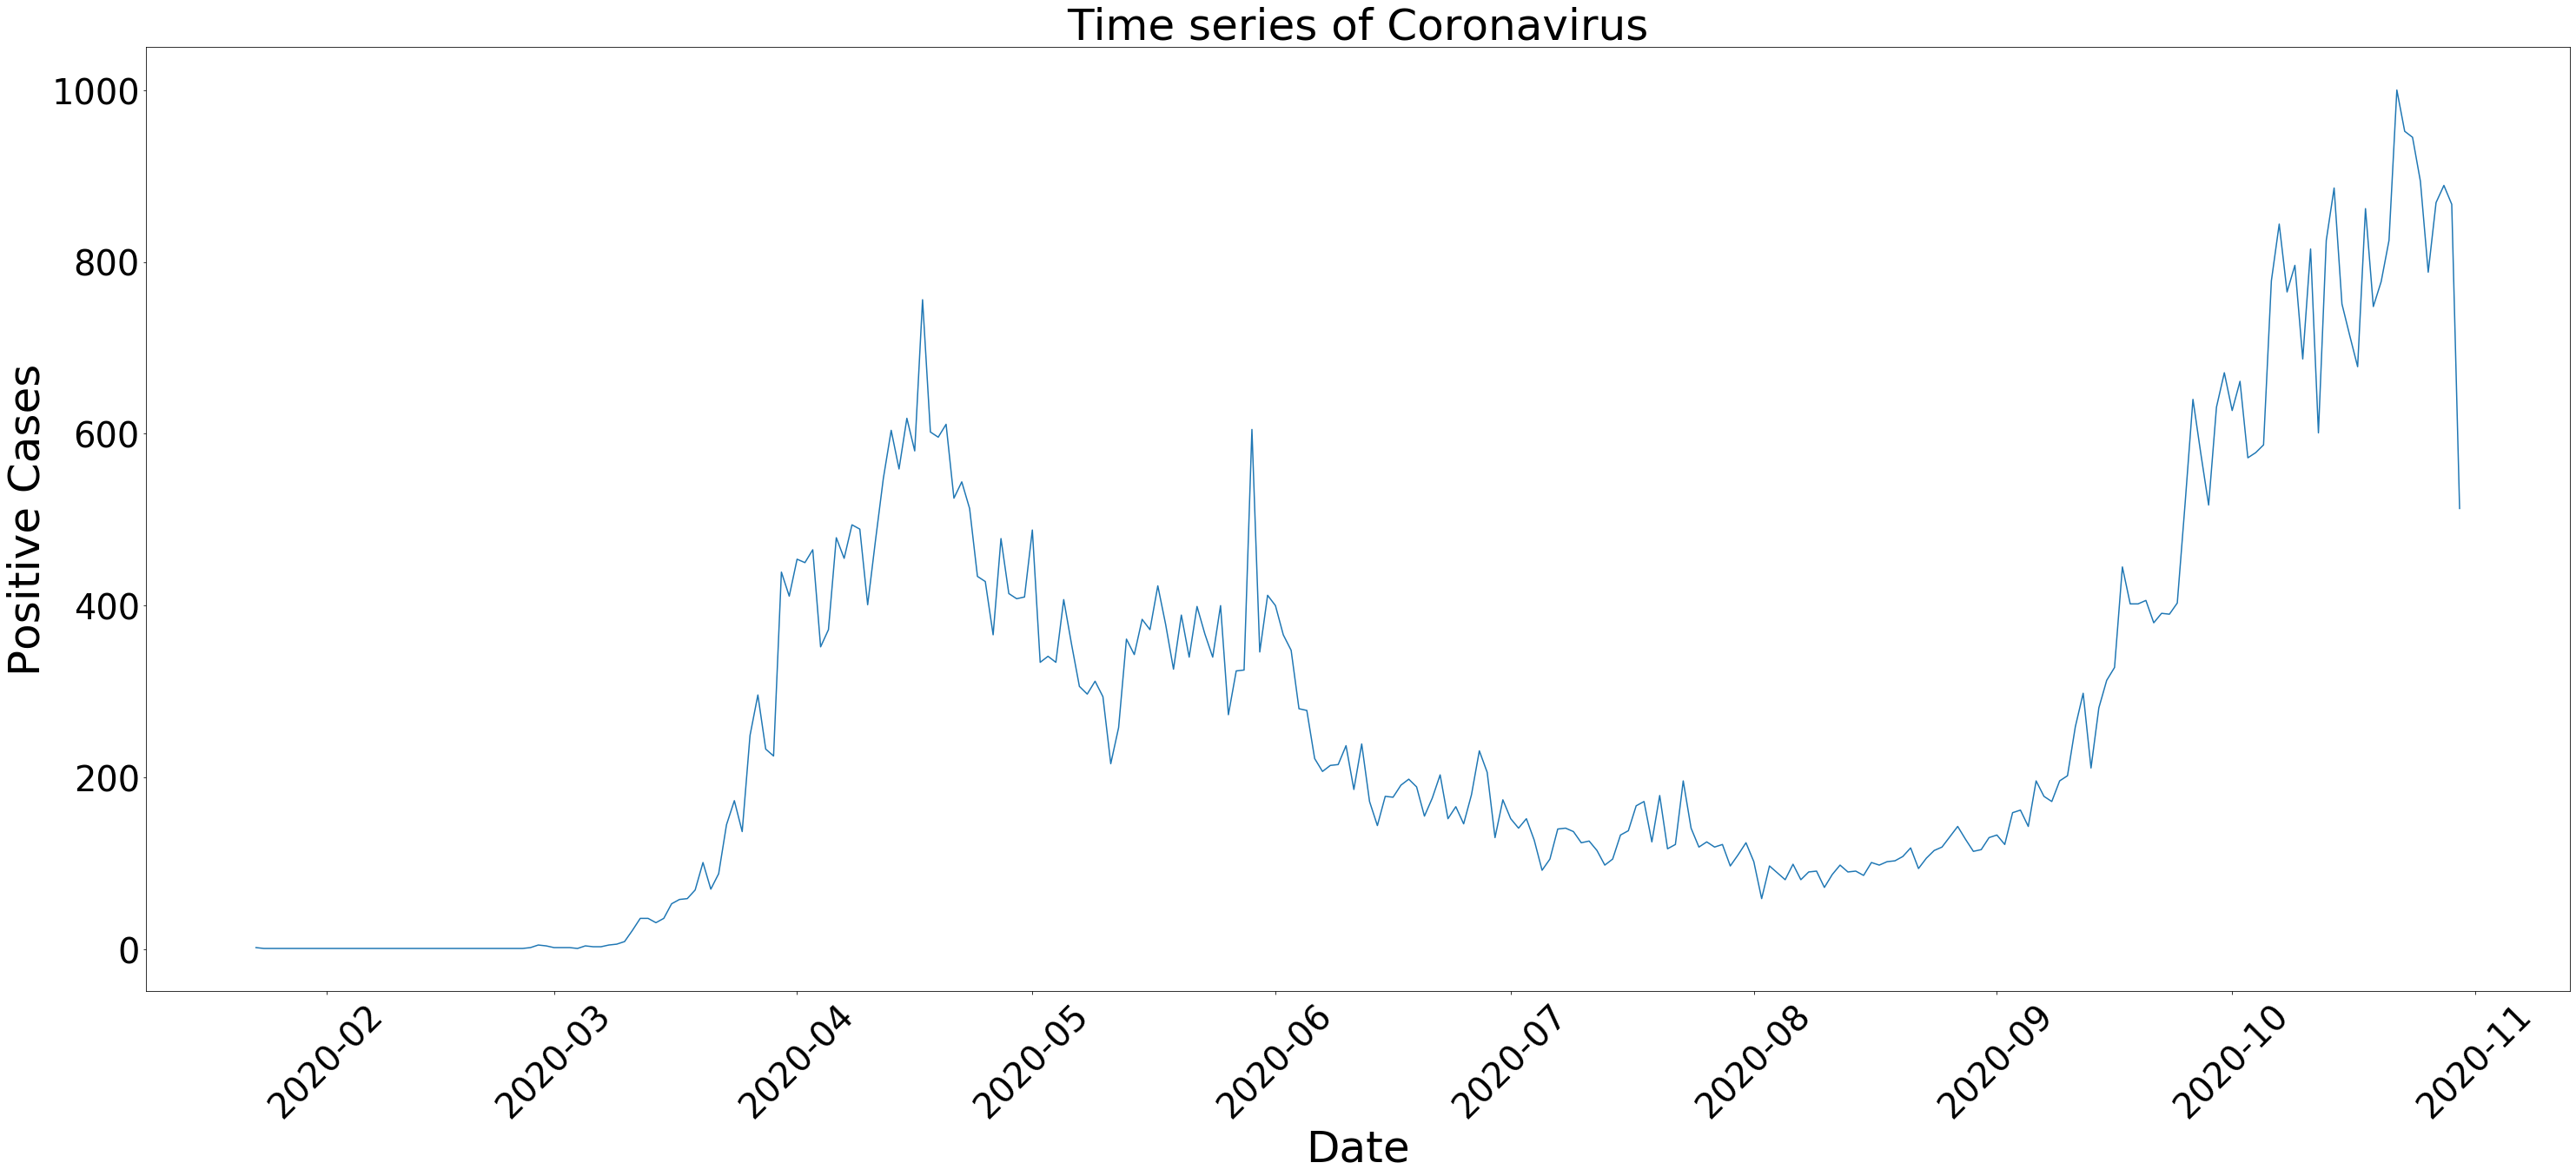

In [81]:
"""This dataset is from https://data.ontario.ca/dataset/confirmed-positive-cases-of-covid-19-in-ontario"""
data2 = pd.read_csv("coronavirus_data_with_time.csv")
data2.columns
df = data2.iloc[:,0:7] #Gets all the rows and only columns 0 - 7 because the rest is not needed for our analysis

df['Frequency'] = df['Case_Reported_Date'].map(df['Case_Reported_Date'].value_counts())
df = df.drop_duplicates('Case_Reported_Date') #figure out a better way to do this
df = df.sort_values('Case_Reported_Date')

final = df[['Case_Reported_Date', 'Frequency']]
final['Case_Reported_Date'] = pd.to_datetime(df['Case_Reported_Date'])
plt.figure(figsize=(50,20))
plt.plot(final['Case_Reported_Date'], final['Frequency'])
plt.xticks(rotation = 45, fontsize = 40)
plt.yticks(fontsize = 40)
plt.xlabel('Date', fontsize = 50)
plt.ylabel('Positive Cases', fontsize = 50)
plt.title('Time series of Coronavirus',fontsize = 50)
plt.show()


In [78]:
#In time series analysis since our observations are not independent we cannot use train test split(randomly) so we must seperate by sequence.
#A statistical model is autoregressive if it predicts future values based on past values.
#Test set shoudl alawys follow training set since it is a time series
x_training_data = final.iloc[0:math.ceil(0.4*len(final['Case_Reported_Date']))]
y_training_data = final.iloc[math.ceil(0.4*len(final['Case_Reported_Date'])):]

print("Row x Col")
print("==============")
print(x_training_data.shape)
print(y_training_data.shape)
print("==============")  
target_column_train = ['Frequency'] 
predictors_train = list(set(list(x_training_data.columns))-set(target_column_train))

print(predictors_train)
print("==============")
x_train = x_training_data[predictors_train].values
y_train = x_training_data[target_column_train].values

print(x_train.shape)
print(y_train.shape)

print("==============")
target_column_test = ['Frequency'] 
predictors_test = list(set(list(y_training_data.columns))-set(target_column_test))
print(predictors_test)
print("==============")
x_test = y_training_data[predictors_test].values
y_test = y_training_data[target_column_test].values
print(x_test.shape)
print(y_test.shape)

tree = DecisionTreeRegressor(max_depth=8, min_samples_leaf=0.13, random_state=3)
tree.fit(x_train, y_train)

final

Row x Col
(101, 2)
(150, 2)
['Case_Reported_Date']
(101, 1)
(101, 1)
['Case_Reported_Date']
(150, 1)
(150, 1)


,Case_Reported_Date,Frequency
17157,2020-01-23,2
17159,2020-01-24,1
71208,2020-02-21,1
17160,2020-02-25,1
17161,2020-02-26,1
...,...,...
12,2020-10-26,788
3,2020-10-27,869
22,2020-10-28,889
46,2020-10-29,867


In [80]:
#negative r square means less accurate, I saw that since the data set is very small, we must not put too much training or it tends to overfit
pred_train_tree= dtree.predict(x_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_tree)))
print(r2_score(y_train, pred_train_tree))

pred_test_tree= dtree.predict(x_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_tree))) 
print(r2_score(y_test, pred_test_tree))



66.74299673195141
0.8873651218542075
272.11256135904995
-0.07125140766110483
